In [1]:
# Importing necessary library
import gym
import pygame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize Pygame
pygame.init()

(5, 0)

In [3]:
# Creating CartPole enviroment
env = gym.make('CartPole-v1', render_mode="rgb_array")

In [4]:
# Setting up display for Pygame
screen_width, screen_height = 600, 400
screen = pygame.display.set_mode((screen_width, screen_height))
clock = pygame.time.Clock()

In [5]:
# Function to render the environment
def render(screen, env_rgb):
    surf = pygame.surfarray.make_surface(env_rgb.swapaxes(0, 1))
    screen.blit(surf, (0, 0))
    pygame.display.flip()

In [6]:
# Simple random agent
def random_agent(observation):
    return env.action_space.sample()

In [7]:
# Main game loop
def run_episode(agent, max_steps=1000):
    observation, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = agent(observation)
        observation, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        
        # Render the environment
        env_rgb = env.render()
        render(screen, env_rgb)
        
        # Handle Pygame events
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                return total_reward
        
        clock.tick(60)  # 60 FPS
        
        if done or truncated:
            break
    
    return total_reward

In [ ]:
# Run the game
num_episodes = 100
rewards = []

for episode in range(num_episodes):
    reward = run_episode(random_agent)
    rewards.append(reward)
    print(f"Episode {episode + 1} reward: {reward}")

print(f"Average reward: {np.mean(rewards)}")

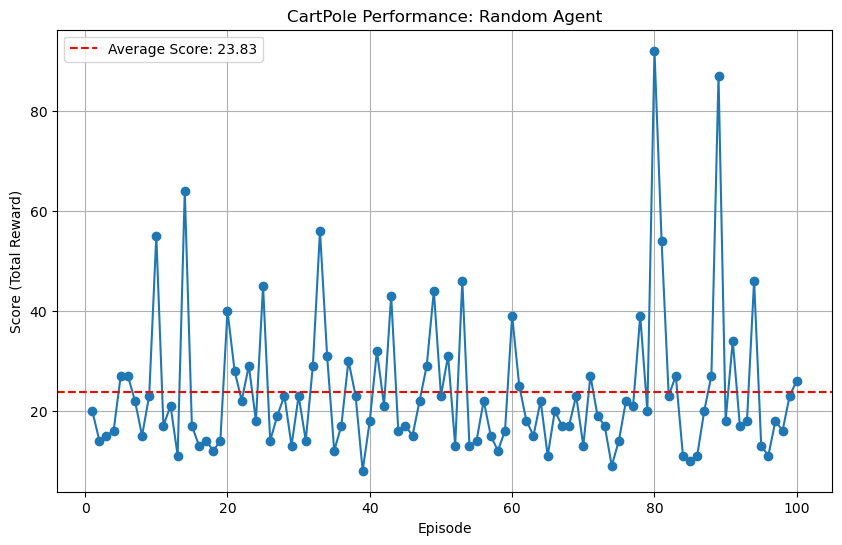

In [9]:
# Create the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), rewards, marker='o')
plt.title('CartPole Performance: Random Agent')
plt.xlabel('Episode')
plt.ylabel('Score (Total Reward)')
plt.grid(True)

# Add a horizontal line for the average score
average_score = np.mean(rewards)
plt.axhline(y=average_score, color='r', linestyle='--', label=f'Average Score: {average_score:.2f}')

plt.legend()

# Save the graph as an image file
plt.savefig('random_key_model')

# Display the graph

In [10]:
pygame.quit()